In [16]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [24]:
# Load the dataset
data = pd.read_csv('student_methods.csv')

# Display the first few rows of the dataset
data.head()  # Shows the first 5 rows by default


,visual_score,auditory_score,kinesthetic_score,learning_style
0,8.000301,1.389837,9.686887,visual
1,8.401052,7.294055,4.853655,visual
2,9.124874,3.975049,6.688173,auditory
3,5.724100,7.702631,7.535001,auditory
4,5.060739,4.711628,4.302653,kinesthetic


In [18]:
# Encode target labels
le = LabelEncoder()
data['learning_style_encoded'] = le.fit_transform(data['learning_style'])

In [19]:
# Features and target
X = data[['visual_score', 'auditory_score', 'kinesthetic_score']]
y = data['learning_style_encoded']

In [20]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [22]:
# Generate confusion matrix and evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

Accuracy: 0.50
Precision: 0.46
Recall: 0.50


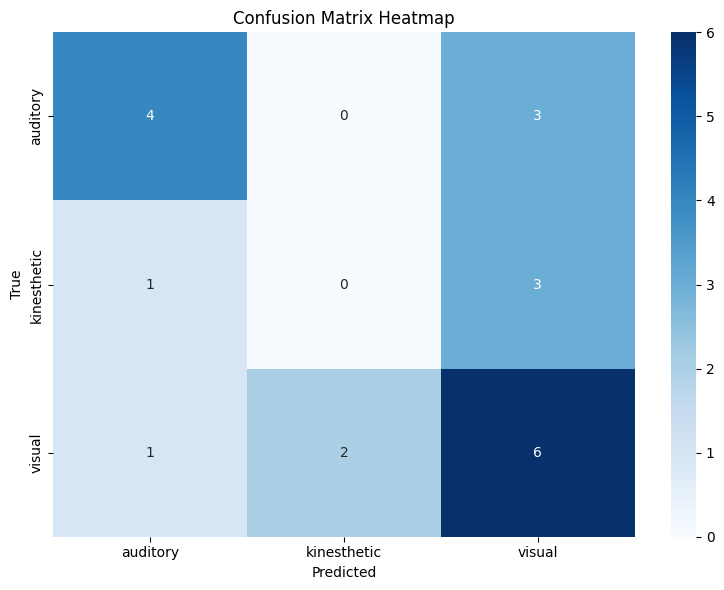

In [25]:
# Plot heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()